In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
emails = pd.read_csv('../../data/emails.csv')
questions = pd.read_csv('../../data/questions.csv')
professionals = pd.read_csv('../../data/professionals.csv')
comments = pd.read_csv('../../data/comments.csv')
tag_users = pd.read_csv('../../data/tag_users.csv')
group_memberships = pd.read_csv('../../data/group_memberships.csv')
tags = pd.read_csv('../../data/tags.csv')
students = pd.read_csv('../../data/students.csv')
groups = pd.read_csv('../../data/groups.csv')
tag_questions = pd.read_csv('../../data/tag_questions.csv')
matches = pd.read_csv('../../data/matches.csv')
answers = pd.read_csv('../../data/answers.csv')
school_memberships = pd.read_csv('../../data/school_memberships.csv')

---

# Explaratory data analysis

In [4]:
answered_questions = pd.DataFrame(answers.answers_question_id.unique())
answered_questions.shape

(23110, 1)

In [5]:
questions.shape

(23931, 5)

In [6]:
# Number of questions with given number of tags 
(tag_questions.groupby('tag_questions_question_id').count().reset_index()
 .groupby('tag_questions_tag_id').count().reset_index().rename(
     columns={'tag_questions_question_id': 'number_of_questions',
              'tag_questions_tag_id': 'number_of_tags'
             })).head()

,number_of_tags,number_of_questions
0,1,5056
1,2,4652
2,3,4510
3,4,3524
4,5,2466


In [7]:
qa = questions.merge(answers, how='right', left_on='questions_id', right_on='answers_question_id')
qa.shape[0]

51123

In [ ]:
# Check how much we lose by removing professional who change status to students and vise versa

In [13]:
# Check how much we lose by removing professional who change status to students and vise versa
temp = qa
temp = temp.merge(professionals, how='inner', left_on='answers_author_id', right_on='professionals_id')
print(temp.shape[0])
temp = temp.merge(students, how='inner', left_on='questions_author_id', right_on='students_id')
print(temp.shape[0])

# Create que-ans-pro dataset
qap = temp[[
    'questions_id', 'questions_title', 'questions_date_added', 'questions_body', 'answers_id',
    'answers_date_added', 'answers_body', 'professionals_id', 'professionals_location',
    'professionals_industry', 'professionals_headline', 'professionals_date_joined',
    'students_id', 'students_location', 'students_date_joined'
]]
qap.head(1)

50106
49723


,questions_id,questions_title,questions_date_added,questions_body,answers_id,answers_date_added,answers_body,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,students_id,students_location,students_date_joined
0,332a511f1569444485cf7a7a556a5e54,Teacher career question,2016-04-26 11:14:26 UTC+0000,What is a maths teacher? what is a ma...,4e5f01128cae4f6d8fd697cec5dca60c,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32 UTC+0000


---

# Get tag id string for each question

In [9]:
# Get tags for each question in lists
tag_groups = tag_questions.groupby('tag_questions_question_id')
tag_groups_dict = {}

# Concatenate tag lists in single strings
for question_id, tags in tag_groups:
    tag_list = tags['tag_questions_tag_id'].apply(str)
    tag_groups_dict[question_id] = ','.join(list(tag_list))

# Create a DataFrame storing tags for questions in strings
tag_groups = pd.DataFrame.from_dict(tag_groups_dict, orient='index').reset_index()
tag_groups.rename({'index': 'questions_id', 0: 'questions_tags'}, axis=1, inplace=True)
tag_groups.head()

# Add question tags to qa_data
# qa_data = qa_data.merge(tag_groups, how='left', on='questions_id')

,questions_id,questions_tags
0,0003e7bf48f24b5c985f8fce96e611f3,"1707,18073,27330,27510,33630,29649"
1,0006609dd4da40dcaa5a83e0499aba14,"18360,18370"
2,000af224bc2f4e94a19f8b62ba279cc4,"51,18156"
3,000b30fb534b41f7b716fa9ebf9c3f35,"29,12217,18216,25883"
4,0018752e44b44e26bb74a0a43232b4d6,"18032,33245"


---

# Compute email_activated feature

In [19]:
prof_emails_received = pd.merge(professionals, emails, how='inner', left_on='professionals_id', right_on='emails_recipient_id')
prof_emails_received.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily
1,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily
3,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily
4,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40 UTC+0000,email_notification_daily


In [20]:
prof_emails_received.shape

(1850101, 9)

In [21]:
prof_emails = prof_emails_received[['professionals_id', 'emails_id', 'emails_frequency_level', 'emails_date_sent']]
prof_emails.head()

,professionals_id,emails_id,emails_frequency_level,emails_date_sent
0,0c673e046d824ec0ad0ebe012a0673e4,2337714,email_notification_daily,2018-12-07 01:05:40 UTC+0000
1,0c673e046d824ec0ad0ebe012a0673e4,2336077,email_notification_daily,2018-12-06 01:14:15 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,2314660,email_notification_daily,2018-11-17 00:38:27 UTC+0000
3,0c673e046d824ec0ad0ebe012a0673e4,2312639,email_notification_daily,2018-11-16 00:32:19 UTC+0000
4,0c673e046d824ec0ad0ebe012a0673e4,2299700,email_notification_daily,2018-11-08 00:16:40 UTC+0000


In [22]:
prof_email_questions = prof_emails.merge(
    matches, how='inner', left_on='emails_id', right_on='matches_email_id')
prof_email_questions.shape

(4316275, 6)

In [23]:
prof_answered_questions = qap[['professionals_id', 'questions_id', 'questions_date_added', 'answers_date_added']]
prof_answered_questions.shape

(49723, 4)

In [72]:
questions_answered_from_emails = pd.merge(
    prof_email_questions, prof_answered_questions, how='inner',
    left_on=['professionals_id', 'matches_question_id'],
    right_on=['professionals_id', 'questions_id'])

questions_answered_from_emails.shape

(17518, 9)

In [73]:
questions_answered_from_emails.head()

,professionals_id,emails_id,emails_frequency_level,emails_date_sent,matches_email_id,matches_question_id,questions_id,questions_date_added,answers_date_added
0,81999d5ad93549dab55636a545e84f2a,1394664,email_notification_daily,2017-09-30 04:16:01 UTC+0000,1394664,5cb6040f85d34c03a95f27244bc40e29,5cb6040f85d34c03a95f27244bc40e29,2017-09-29 12:45:43 UTC+0000,2017-09-30 15:35:03 UTC+0000
1,81999d5ad93549dab55636a545e84f2a,560470,email_notification_daily,2016-05-25 23:26:05 UTC+0000,560470,2c7bb1973510493aa8daf75e08bbe773,2c7bb1973510493aa8daf75e08bbe773,2016-05-25 17:49:15 UTC+0000,2016-05-27 22:41:28 UTC+0000
2,7d425e8d7cfb4fe7b0702fff4d6d84e7,919741,email_notification_daily,2016-11-07 23:09:02 UTC+0000,919741,0803ed6276ae43eb80fd1a2e2386a526,0803ed6276ae43eb80fd1a2e2386a526,2016-10-31 21:43:59 UTC+0000,2016-11-08 00:47:24 UTC+0000
3,7d425e8d7cfb4fe7b0702fff4d6d84e7,916502,email_notification_daily,2016-11-05 23:45:31 UTC+0000,916502,384c809662f348daa8a8019f7a10ded4,384c809662f348daa8a8019f7a10ded4,2016-10-31 04:49:58 UTC+0000,2016-11-06 16:18:33 UTC+0000
4,7d425e8d7cfb4fe7b0702fff4d6d84e7,883636,email_notification_daily,2016-10-26 23:18:27 UTC+0000,883636,c4e51d0e3e9440d6b4bec6a352426c30,c4e51d0e3e9440d6b4bec6a352426c30,2016-05-16 21:52:09 UTC+0000,2016-10-26 23:20:25 UTC+0000


In [74]:
email_activated = (questions_answered_from_emails
                   .groupby('professionals_id')[['questions_id']].count()
                   .rename(columns={'questions_id': 'professionals_email_activated'}))
email_activated.shape

(3746, 1)

## Consider a particular professional

In [46]:
prof_id = '369f1c8646b649f6997eae7809696bd5'

In [47]:
particular_prof_emails = prof_emails_received[prof_emails_received.professionals_id == prof_id]

In [48]:
particular_prof_emails.shape

(930, 9)

In [49]:
particular_prof_emails = particular_prof_emails[['professionals_date_joined', 'emails_id',
                                                 'emails_frequency_level', 'emails_date_sent']]
particular_prof_emails.shape

(930, 4)

In [50]:
particular_prof_email_questions = particular_prof_emails.merge(
    matches, how='inner', left_on='emails_id', right_on='matches_email_id')
particular_prof_email_questions.shape

(2160, 6)

In [51]:
particular_prof_answered_questions = qap[qap.professionals_id == prof_id]
particular_prof_answered_questions = particular_prof_answered_questions[['questions_id', 'questions_date_added',
                                                                         'answers_date_added']]

In [52]:
particular_prof_answered_questions.shape

(401, 3)

In [53]:
questions_answered_from_emails = pd.merge(
    particular_prof_email_questions, particular_prof_answered_questions,
    how='inner', left_on='matches_question_id', right_on='questions_id')
questions_answered_from_emails = questions_answered_from_emails[[
    'professionals_date_joined', 'emails_id', 'emails_frequency_level', 'emails_date_sent',
    'questions_id', 'questions_date_added', 'answers_date_added'
]]
questions_answered_from_emails.shape

(60, 7)

In [55]:
questions_answered_from_emails.head(1)

,professionals_date_joined,emails_id,emails_frequency_level,emails_date_sent,questions_id,questions_date_added,answers_date_added
0,2015-02-05 17:52:38 UTC+0000,970937,email_notification_daily,2016-12-13 23:12:40 UTC+0000,6bfc3c65b5744801bd440538ee8b297c,2016-12-05 21:20:22 UTC+0000,2016-12-15 17:46:34 UTC+0000


---

# Compute number of answered questions and average question age

In [97]:
all_data = qap

In [99]:
# Transform all dates from string representation to python datetime object
# and add question_time_to_answer feature
all_data.answers_date_added = pd.to_datetime(all_data.answers_date_added)
all_data.questions_date_added = pd.to_datetime(all_data.questions_date_added)
all_data['questions_age'] = all_data.answers_date_added - all_data.questions_date_added

In [106]:
number_answered = all_data[['questions_id', 'professionals_id']].groupby('professionals_id').count()
number_answered = number_answered.rename({'questions_id': 'professionals_questions_answered'}, axis=1)
number_answered.head()

,professionals_questions_answered
professionals_id,
00009a0f9bda43eba47104e9ac62aff5,3
000d4635e5da41e3bfd83677ee11dda4,3
00271cc10e0245fba4a35e76e669c281,24
003cc21be89d4e42bc4424131a378e86,4
0046ab8089c04b3a8df3f8c28621a818,5


In [118]:
active_professionals = pd.DataFrame({'professionals_id': all_data.professionals_id.unique()})
active_professionals.head()

,professionals_id
0,36ff3b3666df400f956f8335cf53e09e
1,05ab77d4c6a141b999044ebbf5415b0d
2,58fa5e95fe9e480a9349bbb1d7faaddb
3,97556cfd2ee14bada22d55cf172c299e
4,dfbfda742bee4f5b8df7024c66cf77b4


In [119]:
prof_data = professionals.merge(active_professionals, how='right', on='professionals_id')
prof_data.professionals_date_joined = pd.to_datetime(prof_data.professionals_date_joined)

In [120]:
prof_data = prof_data.merge(number_answered, left_on='professionals_id', right_index=True)

In [121]:
prof_data.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,professionals_questions_answered
0,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34
1,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29,23
2,c9bfa93898594cbbace436deca644c64,NaN,NaN,NaN,2011-12-12 14:25:46,1
3,5a4a16842ec64430ac3f916aacf35fe1,NaN,NaN,NaN,2011-12-26 05:00:00,1
4,81999d5ad93549dab55636a545e84f2a,NaN,NaN,NaN,2011-12-26 05:00:00,3


In [93]:
average_question_age = (
    all_data.groupby('professionals_id')
    .questions_age.mean(numeric_only=False)
)

In [94]:
average_question_age = pd.DataFrame({'professionals_average_question_age': average_question_age})
average_question_age.head()

,professionals_average_question_age
professionals_id,
00009a0f9bda43eba47104e9ac62aff5,283 days 02:55:40.666666
000d4635e5da41e3bfd83677ee11dda4,133 days 03:54:34.666666
00271cc10e0245fba4a35e76e669c281,218 days 05:22:24.458333
003cc21be89d4e42bc4424131a378e86,398 days 22:50:44
0046ab8089c04b3a8df3f8c28621a818,117 days 19:17:26


In [113]:
prof_data = prof_data.merge(average_question_age, on='professionals_id')
prof_data.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,professionals_questions_answered,professionals_average_question_age
0,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705
1,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705
3,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705
4,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,34,15 days 06:42:05.764705


In [140]:
# Now the same for students
active_students = pd.DataFrame({'students_id': all_data.students_id.unique()})
active_students.head()

,students_id
0,8f6f374ffd834d258ab69d376dd998f5
1,585ac233015447cc9e9a217044e515e1
2,34217a1861d640a58c85e033414cf9cb
3,5b751a8ee4a047f7a08ce9eb5e43e5a2
4,2fe767de78fa4dfd83f0021cf7712064


In [141]:
number_asked = all_data[['questions_id', 'students_id']].groupby('students_id').count()
number_asked = number_asked.rename({'questions_id': 'students_questions_asked'}, axis=1)
number_asked.head()

,students_questions_asked
students_id,
0001a66883f74e8d91884fc6ea0d66a7,4
0004592176864233990d949862baa2f3,2
001bd6f7f1ac4897b0b35dc665c64d2e,7
001d1629d09d441a8f09e3bfa884e6b9,2
001df2a2cfb74ef78f3053ddee305ba6,4


In [142]:
stud_data = students.merge(active_students, how='right', on='students_id')
stud_data.students_date_joined = pd.to_datetime(stud_data.students_date_joined)
stud_data.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24
1,5bdd2eb44dd944a9a7ab9aba068d1ef2,NaN,2012-01-01 05:00:00
2,9658267bc2564a85bad1e802de5fb597,"Wayne, Pennsylvania",2012-01-01 05:00:00
3,7b1900c458e34573bfeb0d57ffbd260a,NaN,2012-01-01 05:00:00
4,e9efc4d6e06e49c7ae5afe1aad8c5bd5,NaN,2012-01-01 05:00:00


In [143]:
stud_data = stud_data.merge(number_asked, left_on='students_id', right_index=True)
stud_data.head()

,students_id,students_location,students_date_joined,students_questions_asked
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24,2
1,5bdd2eb44dd944a9a7ab9aba068d1ef2,NaN,2012-01-01 05:00:00,2
2,9658267bc2564a85bad1e802de5fb597,"Wayne, Pennsylvania",2012-01-01 05:00:00,6
3,7b1900c458e34573bfeb0d57ffbd260a,NaN,2012-01-01 05:00:00,3
4,e9efc4d6e06e49c7ae5afe1aad8c5bd5,NaN,2012-01-01 05:00:00,1


In [144]:
average_question_age = (
    all_data.groupby('students_id')
    .questions_age.mean(numeric_only=False)
)

In [145]:
average_question_age = pd.DataFrame({'students_average_question_age': average_question_age})
average_question_age.head()

,students_average_question_age
students_id,
0001a66883f74e8d91884fc6ea0d66a7,9 days 15:59:08
0004592176864233990d949862baa2f3,218 days 05:37:10.500000
001bd6f7f1ac4897b0b35dc665c64d2e,43 days 09:56:39.571428
001d1629d09d441a8f09e3bfa884e6b9,45 days 09:36:57
001df2a2cfb74ef78f3053ddee305ba6,214 days 14:00:50.750000


In [146]:
stud_data = stud_data.merge(average_question_age, on='students_id')
stud_data.head()

,students_id,students_location,students_date_joined,students_questions_asked,students_average_question_age
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24,2,794 days 06:00:53
1,5bdd2eb44dd944a9a7ab9aba068d1ef2,NaN,2012-01-01 05:00:00,2,2 days 16:05:06.500000
2,9658267bc2564a85bad1e802de5fb597,"Wayne, Pennsylvania",2012-01-01 05:00:00,6,377 days 15:36:03
3,7b1900c458e34573bfeb0d57ffbd260a,NaN,2012-01-01 05:00:00,3,8 days 13:05:38
4,e9efc4d6e06e49c7ae5afe1aad8c5bd5,NaN,2012-01-01 05:00:00,1,21 days 21:56:35


---

# Load preprocessed data

In [3]:
qa_data = pd.read_csv('../../data/qa_data.csv')
stud_data = pd.read_csv('../../data/stud_data.csv')
prof_data = pd.read_csv('../../data/prof_data.csv')

In [4]:
qa_data.questions_date_added = pd.to_datetime(qa_data.questions_date_added)

In [5]:
qa_data.questions_date_added.loc[0].dayofyear

117

# Choose number of categories

In [10]:
ques_by_loc = stud_data.groupby('students_state').students_questions_asked.sum().sort_values(ascending=False)

In [11]:
ques_by_loc.iloc[40:].head()

students_state
Spain          144
Mississippi    135
Nebraska       128
New Mexico     109
Vermont        100
Name: students_questions_asked, dtype: int64

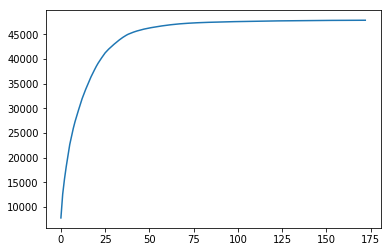

In [215]:
plt.plot(ques_by_loc.values.cumsum());

In [221]:
ques_by_loc.values.cumsum()[40]

45300

In [7]:
ques_by_loc = prof_data.groupby('professionals_state').professionals_questions_answered.sum().sort_values(ascending=False)

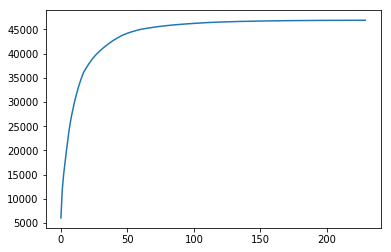

In [8]:
plt.plot(ques_by_loc.values.cumsum());

In [9]:
ques_by_loc.values.cumsum()[40]

42847

In [12]:
ques_by_loc.iloc[:5]

students_state
California       7760
Texas            4813
New York         3033
India            2560
Massachusetts    2268
Name: students_questions_asked, dtype: int64

In [241]:
ques_by_loc = prof_data.groupby('professionals_industry').professionals_questions_answered.sum().sort_values(ascending=False)

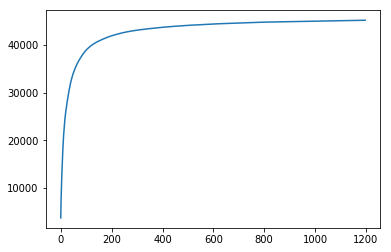

In [242]:
plt.plot(ques_by_loc.values.cumsum());

In [254]:
ques_by_loc.values.cumsum()[100]

38934

---

# Count the number of words in each question

In [153]:
import re
ques = qa_data.answers_body.loc[0]
ques = re.sub(r'(<[^>]*[/]?>|[\r]?\n)', ' ', ques)
ques = re.sub(r' +', ' ', ques).strip()
ques_len = len(ques.split(' '))
ques_len

35

In [154]:
qa_data.answers_body.head()

0    Hi! You are asking a very interesting question...
1    It's helpful to take higher-level classes in S...
2    Essentially, treat them like human beings. You...
3    Check the link below. http://www.educationinfo...
4    Hi Rodrigo! The important thing to remember if...
Name: answers_body, dtype: object

In [155]:
qa_data.answers_body = (qa_data.answers_body
                        .apply(lambda x: re.sub(r'(<[^>]*[/]?>|[\r]?\n)', ' ', str(x)))
                        .apply(lambda x: re.sub(r' +', ' ', x).strip()))
qa_data.answers_body.head()

0    Hi! You are asking a very interesting question...
1    It's helpful to take higher-level classes in S...
2    Essentially, treat them like human beings. You...
3    Check the link below. http://www.educationinfo...
4    Hi Rodrigo! The important thing to remember if...
Name: answers_body, dtype: object

In [156]:
qa_data.questions_body = (qa_data.questions_body
                         .apply(lambda x: re.sub(r'(<[^>]*[/]?>|[\r]?\n)', ' ', str(x)))
                         .apply(lambda x: re.sub(r' +', ' ', x).strip()))
qa_data.questions_body.head()

0    What is a maths teacher? what is a maths teach...
1    Hi I am doing my 10th Standard. What are the q...
2    Hi I am doing my 10th Standard. What are the q...
3    Hi I am doing my 10th Standard. What are the q...
4    I like soccer because i been playing sense i w...
Name: questions_body, dtype: object

In [157]:
qa_data['questions_body_length'] = qa_data.questions_body.apply(lambda x: len(x.split(' ')))
qa_data.head()

,students_id,questions_id,questions_title,questions_body,questions_body_length,questions_date_added,professionals_id,answers_id,answers_body,professionals_last_answer_date
0,8f6f374ffd834d258ab69d376dd998f5,332a511f1569444485cf7a7a556a5e54,Teacher career question,What is a maths teacher? what is a maths teach...,14,2016-04-26 11:14:26,36ff3b3666df400f956f8335cf53e09e,4e5f01128cae4f6d8fd697cec5dca60c,Hi! You are asking a very interesting question...,2016-04-29 14:15:00
1,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,27,2016-04-26 10:59:44,05ab77d4c6a141b999044ebbf5415b0d,334f6735d31e45589e43da5ae7056e50,It's helpful to take higher-level classes in S...,2018-03-08 18:23:01
2,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,27,2016-04-26 10:59:44,05ab77d4c6a141b999044ebbf5415b0d,e5d66281cc314675b95ddbb799b75473,"Essentially, treat them like human beings. You...",2018-03-08 18:23:36
3,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,27,2016-04-26 10:59:44,58fa5e95fe9e480a9349bbb1d7faaddb,e5c0da2a29ff414fa76b9da6e86337fc,Check the link below. http://www.educationinfo...,2016-07-03 18:09:58
4,585ac233015447cc9e9a217044e515e1,0f1d6a4f276c4a05878dd48e03e52289,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,27,2016-05-19 22:16:25,36ff3b3666df400f956f8335cf53e09e,f3519ab99a1a4a13a8a9ecb814287d2a,Hi Rodrigo! The important thing to remember if...,2016-07-31 15:10:27


In [158]:
qa_data['answers_body_length'] = qa_data.answers_body.apply(lambda x: len(x.split(' ')))
qa_data.head()

,students_id,questions_id,questions_title,questions_body,questions_body_length,questions_date_added,professionals_id,answers_id,answers_body,professionals_last_answer_date,answers_body_length
0,8f6f374ffd834d258ab69d376dd998f5,332a511f1569444485cf7a7a556a5e54,Teacher career question,What is a maths teacher? what is a maths teach...,14,2016-04-26 11:14:26,36ff3b3666df400f956f8335cf53e09e,4e5f01128cae4f6d8fd697cec5dca60c,Hi! You are asking a very interesting question...,2016-04-29 14:15:00,35
1,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,27,2016-04-26 10:59:44,05ab77d4c6a141b999044ebbf5415b0d,334f6735d31e45589e43da5ae7056e50,It's helpful to take higher-level classes in S...,2018-03-08 18:23:01,268
2,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,27,2016-04-26 10:59:44,05ab77d4c6a141b999044ebbf5415b0d,e5d66281cc314675b95ddbb799b75473,"Essentially, treat them like human beings. You...",2018-03-08 18:23:36,88
3,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,27,2016-04-26 10:59:44,58fa5e95fe9e480a9349bbb1d7faaddb,e5c0da2a29ff414fa76b9da6e86337fc,Check the link below. http://www.educationinfo...,2016-07-03 18:09:58,5
4,585ac233015447cc9e9a217044e515e1,0f1d6a4f276c4a05878dd48e03e52289,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,27,2016-05-19 22:16:25,36ff3b3666df400f956f8335cf53e09e,f3519ab99a1a4a13a8a9ecb814287d2a,Hi Rodrigo! The important thing to remember if...,2016-07-31 15:10:27,73


In [159]:
average_question_body_length = qa_data.groupby('professionals_id')[['questions_body_length']].mean().reset_index()
average_answer_body_length = qa_data.groupby('professionals_id')[['answers_body_length']].mean().reset_index()

In [160]:
prof_data = (prof_data.merge(average_question_body_length, on='professionals_id')
             .rename(columns={'questions_body_length': 'professionals_average_question_body_length'}))
prof_data = (prof_data.merge(average_answer_body_length, on='professionals_id')
             .rename(columns={'answers_body_length': 'professionals_average_answer_body_length'}))
prof_data.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,professionals_state,professionals_questions_answered,professionals_average_question_age,professionals_email_activated,professionals_average_question_body_length,professionals_average_answer_body_length
0,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,New York,34,15 days 06:42:05.764705882,0.000000,29.823529,356.088235
1,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29,Massachusetts,23,4 days 17:47:48.608695652,0.000000,33.956522,138.217391
2,c9bfa93898594cbbace436deca644c64,NaN,NaN,NaN,2011-12-12 14:25:46,NaN,1,4 days 05:29:16.000000000,0.000000,24.000000,208.000000
3,5a4a16842ec64430ac3f916aacf35fe1,NaN,NaN,NaN,2011-12-26 05:00:00,NaN,1,4 days 19:47:56.000000000,0.000000,37.000000,527.000000
4,81999d5ad93549dab55636a545e84f2a,NaN,NaN,NaN,2011-12-26 05:00:00,NaN,3,2 days 04:26:30.333333333,0.666667,21.333333,556.333333


# Get last answer dates for every professional

In [6]:
qa_data.professionals_last_answer_date.sort_values().head()

7598     2011-10-18 17:31:26
24756    2011-11-09 20:39:29
39899    2011-12-12 14:25:46
40484    2011-12-26 05:00:00
49298    2011-12-26 05:00:00
Name: professionals_last_answer_date, dtype: object

In [7]:
qa_data.professionals_last_answer_date = qa_data.professionals_last_answer_date.apply(np.datetime64)

In [8]:
qa_data.professionals_last_answer_date.sort_values().head()

7598    2011-10-18 17:31:26
24756   2011-11-09 20:39:29
39899   2011-12-12 14:25:46
40484   2011-12-26 05:00:00
49298   2011-12-26 05:00:00
Name: professionals_last_answer_date, dtype: datetime64[ns]

In [69]:
# Change last_answer_date feature for incorrect professionals
pro_date_dict = {pro_id:df_slice.professionals_last_answer_date.sort_values().values
                 for pro_id, df_slice in qa_data.groupby('professionals_id')}

In [70]:
pro_date_dict['00271cc10e0245fba4a35e76e669c281'][0]

numpy.datetime64('2016-04-27T16:38:34.000000000')

In [71]:
import pickle
with open('pro_date_dict.pickle', 'wb') as f:
    pickle.dump(pro_time_dict, f)

In [82]:
data = qa_data.merge(answers[['answers_id', 'answers_date_added']], on='answers_id')

In [87]:
data.answers_date_added = pd.to_datetime(data.answers_date_added)

In [88]:
que_date_dict = {que:np.datetime64(date) for que, date in data[['questions_id', 'answers_date_added']].values}
que_date_dict['332a511f1569444485cf7a7a556a5e54']

numpy.datetime64('2016-04-29T19:40:14.000000')

In [89]:
import pickle
with open('que_date_dict.pickle', 'wb') as f:
    pickle.dump(que_date_dict, f)

# Get prev_answer_date for every answer

In [ ]:
qa_data = qa_data.drop(columns='professionals_last_answer_date')

In [ ]:
qa_data.head()

In [6]:
# Select only unique professionals
temp = qa_data[['professionals_id', 'answers_date_added', 'answers_id']]
prof_unique = pd.DataFrame(temp.professionals_id.unique(), columns=['professionals_id'])
prof_unique = prof_unique.merge(professionals, on='professionals_id')
print(prof_unique.shape)

# For every professional add a "dummy" question with answer date being professional's registration date
prof_unique['answers_id'] = list(None for _ in range(prof_unique.shape[0]))
prof_unique['answers_date_added'] = prof_unique['professionals_date_joined']
prof_unique = prof_unique[['professionals_id', 'answers_date_added', 'answers_id']]
# prof_unique.head()

# Add "dummy" questions to all questions
temp = pd.concat([temp, prof_unique])

# Sort by professionals and answer dates
temp = temp.sort_values(by=['professionals_id', 'answers_date_added']).reset_index(drop=True)
# temp.head()

# Get the sorted representation of the answers_date_added and shift the index down by one
# so that current question is aligned with previous question answer date
last_answer_date = pd.DataFrame({'professionals_prev_answer_date': temp.answers_date_added})
last_answer_date.index += 1

# Add the professionals_last_answer_date column to temp
temp = temp.merge(last_answer_date, left_index=True, right_index=True)
temp.dropna(subset=['answers_id'], inplace=True)
temp.drop(columns=['professionals_id', 'answers_date_added'], inplace=True)
# temp[temp.professionals_id == '003cc21be89d4e42bc4424131a378e86']

# # Add professionals_last_answer_date column to qa_data 
qa_data = qa_data.merge(temp, on='answers_id')
(qa_data[qa_data.professionals_id == '003cc21be89d4e42bc4424131a378e86']
 [['answers_date_added', 'professionals_prev_answer_date']]).sort_values(by='answers_date_added')

(10015, 5)


,answers_date_added,professionals_prev_answer_date
35243,2017-10-19 18:16:16,2017-10-19 18:08:19 UTC+0000
34793,2017-10-19 18:34:17,2017-10-19 18:16:16
34620,2017-10-19 18:47:15,2017-10-19 18:34:17
35255,2017-10-19 18:53:27,2017-10-19 18:47:15


In [7]:
qa_data.professionals_prev_answer_date = pd.to_datetime(qa_data.professionals_prev_answer_date)

In [14]:
(qa_data[qa_data.professionals_id == '36ff3b3666df400f956f8335cf53e09e']
 [['answers_date_added', 'professionals_prev_answer_date']]).sort_values(by='answers_date_added').head()

,answers_date_added,professionals_prev_answer_date
8473,2015-10-19 21:14:32,2015-10-19 20:56:49
704,2015-10-21 17:07:47,2015-10-19 21:14:32
705,2015-10-21 17:18:46,2015-10-21 17:07:47
10455,2015-10-22 21:26:56,2015-10-21 17:18:46
11101,2015-10-22 21:34:24,2015-10-22 21:26:56


In [23]:
qa_data.to_csv('../../data/qa_data.csv', index=False)

# Compute the distribution of questions age

In [7]:
qa_data.head()

,students_id,questions_id,questions_title,questions_body,questions_body_length,questions_date_added,professionals_id,answers_id,answers_body,answers_date_added,professionals_prev_answer_date
0,8f6f374ffd834d258ab69d376dd998f5,332a511f1569444485cf7a7a556a5e54,Teacher career question,What is a maths teacher? what is a maths teach...,14,2016-04-26 11:14:26,36ff3b3666df400f956f8335cf53e09e,4e5f01128cae4f6d8fd697cec5dca60c,Hi! You are asking a very interesting question...,2016-04-29 19:40:14,2016-04-29 14:15:00
1,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,27,2016-04-26 10:59:44,05ab77d4c6a141b999044ebbf5415b0d,334f6735d31e45589e43da5ae7056e50,It's helpful to take higher-level classes in S...,2018-03-08 18:23:36,2018-03-08 18:23:01
2,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,27,2016-04-26 10:59:44,05ab77d4c6a141b999044ebbf5415b0d,e5d66281cc314675b95ddbb799b75473,"Essentially, treat them like human beings. You...",2018-03-08 18:24:03,2018-03-08 18:23:36
3,8f6f374ffd834d258ab69d376dd998f5,7a0d4bc67b1c492fb06fe455b1c07faf,Teacher's Qualification,Hi I am doing my 10th Standard. What are the q...,27,2016-04-26 10:59:44,58fa5e95fe9e480a9349bbb1d7faaddb,e5c0da2a29ff414fa76b9da6e86337fc,Check the link below. http://www.educationinfo...,2016-07-03 18:38:36,2016-07-03 18:09:58
4,585ac233015447cc9e9a217044e515e1,0f1d6a4f276c4a05878dd48e03e52289,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,27,2016-05-19 22:16:25,36ff3b3666df400f956f8335cf53e09e,f3519ab99a1a4a13a8a9ecb814287d2a,Hi Rodrigo! The important thing to remember if...,2016-07-31 15:35:54,2016-07-31 15:10:27


In [8]:
que_age = pd.to_datetime(qa_data.answers_date_added) - pd.to_datetime(qa_data.questions_date_added)

In [9]:
que_age.head()

0     3 days 08:25:48
1   681 days 07:23:52
2   681 days 07:24:19
3    68 days 07:38:52
4    72 days 17:19:29
dtype: timedelta64[ns]

In [11]:
que_age.median()

Timedelta('22 days 05:09:30')

In [12]:
que_age.mean()

Timedelta('137 days 08:06:53.302783')

In [13]:
que_age = que_age.apply(lambda x: x.days + np.round(x.seconds / 3600) / 24)

In [14]:
que_age.head()

0      3.333333
1    681.291667
2    681.291667
3     68.333333
4     72.708333
dtype: float64

In [ ]:
plt.plot(np.cumsum(que_))

In [51]:
que_age = np.log1p(que_age)

In [101]:
que_age.mean()

3.093397860277649

In [503]:
mean = 3
lambd = 1 / mean

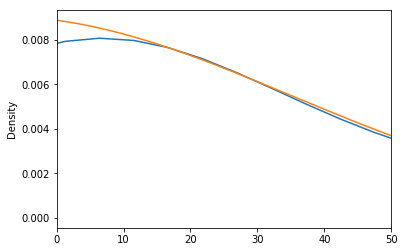

In [17]:
fig, ax = plt.subplots()
que_age.plot(kind='kde')
ax.set_xlim(0, 50)
mu = -9
sigma = 44
x = np.linspace(0, 200, 1000)
y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
ax.plot(x, y);

### But we want some probability in the tail

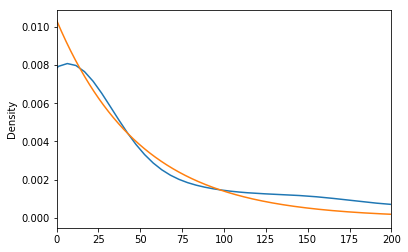

In [32]:
fig, ax = plt.subplots()
que_age.plot(kind='kde')
ax.set_xlim(0, 200)
mean = 50
lambd = 1 / mean
shift = 33
x = np.linspace(shift, 200 + shift, 1000)
y = lambd * np.exp(-lambd * x)
ax.plot(x - shift, y);

### Now try Cauchy pdf

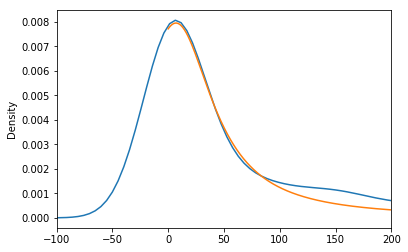

In [163]:
from scipy.stats import cauchy
fig, ax = plt.subplots()
que_age.plot(kind='kde')
ax.set_xlim(-100, 200)
loc = 7
scale = 40
x = np.linspace(0, 200, 1000)
y = cauchy.pdf(x, loc, scale)
ax.plot(x, y);

In [602]:
np.percentile(que_age, 45)

12.5

In [255]:
cut_que_age_df = que_age[(que_age < 100) & (que_age > 3)]
cut_que_age_df.shape

(16241,)

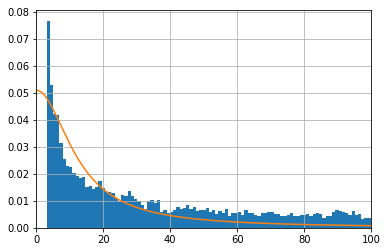

In [504]:
from scipy.stats import cauchy
fig, ax = plt.subplots()
cut_que_age_df.hist(bins=100, density=True)
ax.set_xlim(0, 100)
loc = 0
scale = 12.5
x = np.linspace(0, 100, 1000)
y = 2*cauchy.pdf(x, loc=loc, scale=scale)
ax.plot(x, y);

In [600]:
scale = 12.5
2 * (cauchy.cdf(3.5, loc=loc, scale=scale) - cauchy.cdf(0, loc=loc, scale=scale))

0.1738027384134304

# Count average time between answers over the dataset

In [33]:
import pickle
with open('pro_answer_dates_dict.pickle', 'rb') as f:
    pro_answer_dates_dict = pickle.load(f)

In [34]:
# Load preprocessors here
import os
if os.path.isfile('preprocessors.pickle'):
    with open('preprocessors.pickle', 'rb') as f:
        preproc = pickle.load(f)

In [35]:
for pro, dates in pro_answer_dates_dict.items():
    for i in range(len(pro_answer_dates_dict[pro])):
        pro_answer_dates_dict[pro][i] = preproc['professionals_prev_answer_date_time'].inverse_transform([[pro_answer_dates_dict[pro][i]]])[0][0]

In [36]:
intervals = []
for dates in pro_answer_dates_dict.values():
    for i in range(1, len(dates)):
        intervals.append(dates[i] - dates[i-1])
intervals = np.array(intervals)

In [37]:
intervals *= 365

In [267]:
np.percentile(intervals, 75)

3.166666666703577

In [78]:
interval_df = pd.Series(intervals)
interval_df.head()

0      0.000000
1    372.250000
2      0.000000
3      5.125000
4      2.833333
dtype: float64

In [270]:
cut_interval_df = interval_df[interval_df < 8]
cut_interval_df.shape

(40601,)

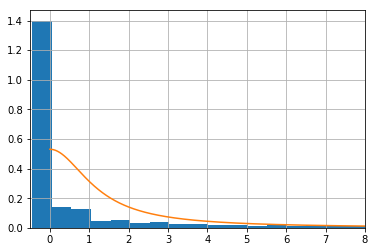

In [271]:
from scipy.stats import cauchy
fig, ax = plt.subplots()
#interval_df.plot(kind='kde')
#cut_interval_df.plot.density()
cut_interval_df.hist(bins=2000, density=True)
ax.set_xlim(-0.5, 8)
loc = 0
scale = 1.2
x = np.linspace(0, 8, 1000)
y = 2*cauchy.pdf(x, loc=loc, scale=scale)
ax.plot(x, y);

In [272]:
scale = 1.2
2 * (cauchy.cdf(3, loc=loc, scale=scale) - cauchy.cdf(0, loc=loc, scale=scale))

0.7577621168183133